In [1]:
import numpy as np
from sklearn.datasets import make_blobs

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

from sklearn.model_selection import train_test_split, cross_val_score

from matplotlib import pyplot as plt
import plotly.express as px
import tqdm

In [2]:
# метод визуализации
# Функция для построения графиков решающих областей
def plot_decision_boundary(model, X, y):
    # Параметры для графика
    h = .02  # Шаг сетки
    cmap = plt.cm.RdYlBu
    markers = 's^o'  # Маркеры для классов

    # Обучение модели
    model.fit(X, y)

    # Размеры графика
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Предсказание значений на сетке
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Построение контуров
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)

    # Разметка классов
    for i, c in zip(range(2), markers):
        plt.scatter(X[y == i][:, 0], X[y == i][:, 1], marker=c, label=f"Class {i}")

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Regions ({type(model).__name__})')
    plt.legend()
    plt.show()


In [3]:
my_random_state = 12345

In [4]:
# сгенерируем данные
from sklearn.datasets import make_blobs

# X, y = make_blobs(n_samples=500, centers=4,
#                   random_state=0, cluster_std=2)

In [5]:
X, y = make_blobs(n_samples=500,
                  centers=2,
                  random_state = my_random_state,
                  cluster_std=8
                  )

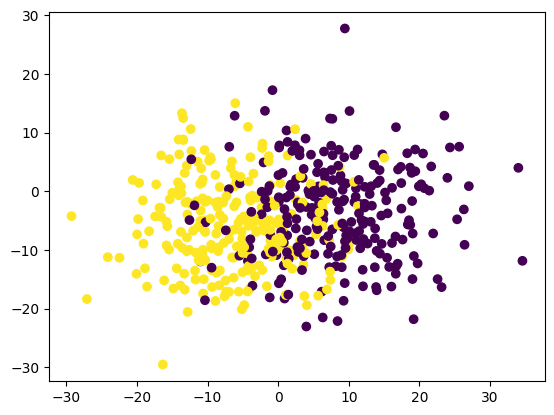

In [6]:
plt.scatter(X[:,0], X[:,1], c = y)

In [7]:
X_train, X_test, y_train , y_test = train_test_split(X,
                                                     y,
                                                     stratify = y,
                                                     random_state=my_random_state)

In [8]:
np.mean(y), np.mean(y_train), np.mean(y_test)

(0.5, 0.5013333333333333, 0.496)

# Построим максимальное дерево

In [9]:
# ?DecisionTreeClassifier

In [10]:
maxtree = DecisionTreeClassifier(random_state=my_random_state,
                                 max_depth=None)

In [11]:
maxtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=12345)

In [12]:
maxtree.score(X_train, y_train), maxtree.score(X_test, y_test)

(1.0, 0.776)

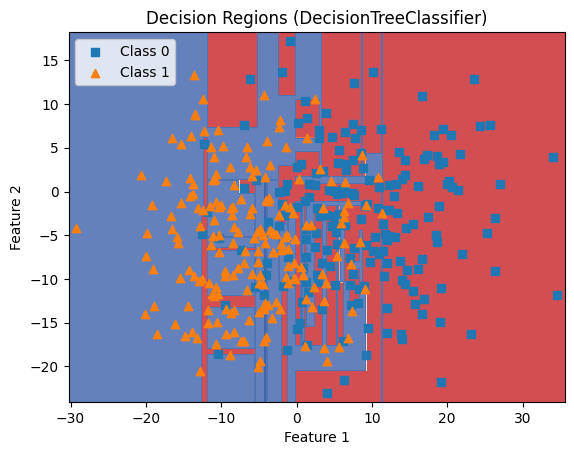

In [13]:
# визуализируем модель
plot_decision_boundary(maxtree, X_train, y_train)

# Бэггинг

In [14]:
# ?BaggingClassifier

In [15]:
bag = BaggingClassifier(estimator=maxtree,
                        n_estimators=200,
                        random_state=my_random_state,
                        max_samples=0.3)

In [16]:
bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=12345),
                  max_samples=0.3, n_estimators=200, random_state=12345)

In [17]:
bag.score(X_train, y_train), bag.score(X_test, y_test)

(0.872, 0.856)

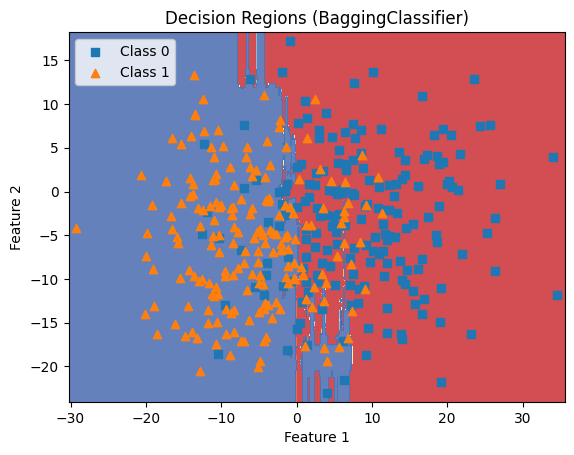

In [18]:
# визуализируем модель
plot_decision_boundary(bag, X_train, y_train)

# Random Forest

In [19]:
# ?RandomForestClassifier

In [20]:
rf = RandomForestClassifier(n_estimators=100,
                            random_state=my_random_state,
                            max_samples=0.3)

In [21]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.3, random_state=12345)

In [22]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.8693333333333333, 0.848)

In [23]:
accuracy_dict = {}
for n in tqdm.tqdm(range(10, 1150, 50), desc="Progress"):
  rf = RandomForestClassifier(n_estimators=n,
                              random_state=my_random_state,
                              max_samples=0.3)
  scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
  avg_accuracy = np.mean(scores)
  accuracy_dict[n] = avg_accuracy

Progress: 100%|██████████| 23/23 [01:51<00:00,  4.85s/it]


In [24]:
accuracy_dict

{10: 0.7653333333333332,
 60: 0.7893333333333333,
 110: 0.7973333333333333,
 160: 0.7893333333333332,
 210: 0.784,
 260: 0.7866666666666667,
 310: 0.792,
 360: 0.7919999999999999,
 410: 0.7919999999999999,
 460: 0.7919999999999999,
 510: 0.7919999999999999,
 560: 0.7919999999999999,
 610: 0.7919999999999999,
 660: 0.7919999999999999,
 710: 0.7919999999999999,
 760: 0.7919999999999999,
 810: 0.7919999999999999,
 860: 0.7946666666666666,
 910: 0.7946666666666666,
 960: 0.7946666666666666,
 1010: 0.7946666666666666,
 1060: 0.7946666666666666,
 1110: 0.7946666666666666}

In [25]:
px.line(x=accuracy_dict.keys(), y=accuracy_dict.values(), labels={'y':'Accuarcy','x':'number of trees' })

In [38]:
rf = RandomForestClassifier(n_estimators=110,
                            random_state=my_random_state,
                            max_samples=0.3)

In [39]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.3, n_estimators=110, random_state=12345)

In [40]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.8693333333333333, 0.848)

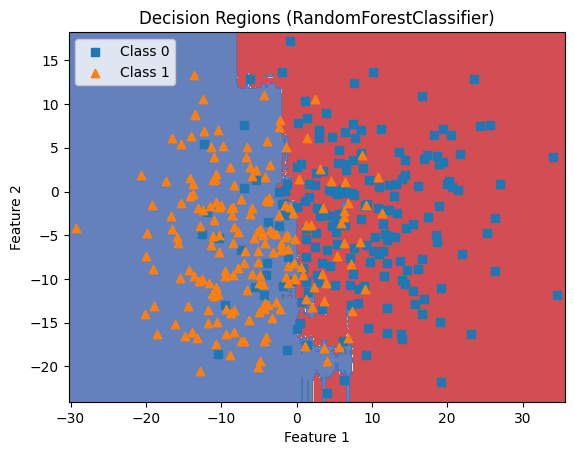

In [41]:
# визуализируем модель
plot_decision_boundary(rf, X_train, y_train)

# Оптимальное дерево

In [30]:
# ?DecisionTreeClassifier

In [31]:
tree_params = {'criterion':['entropy', ],
               'max_depth':[5,7,10,15],
               'ccp_alpha':[0.01, 0.05, 0.1, 0.5, 1]}

In [32]:
best_accuracy = 0
for criterion in tree_params['criterion']:
  for max_depth in tree_params['max_depth']:
    for ccp_alpha in tree_params['ccp_alpha']:
      dtree = DecisionTreeClassifier(criterion=criterion,
                                     max_depth=max_depth,
                                     ccp_alpha=ccp_alpha,
                                     random_state=my_random_state,
                                     )
      scores = cross_val_score(dtree, X_train, y_train, cv=5, scoring='accuracy')
      avg_accuracy = np.mean(scores)
      if avg_accuracy>best_accuracy:
        best_accuracy = avg_accuracy
        best_params = {'criterion':criterion,
                        'max_depth':max_depth,
                        'ccp_alpha':ccp_alpha}

In [33]:
best_params

{'criterion': 'entropy', 'max_depth': 5, 'ccp_alpha': 0.05}

In [34]:
best_tree = DecisionTreeClassifier(**best_params)

In [35]:
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.05, criterion='entropy', max_depth=5)

In [36]:
best_tree.score(X_train, y_train), best_tree.score(X_test, y_test)

(0.8266666666666667, 0.872)

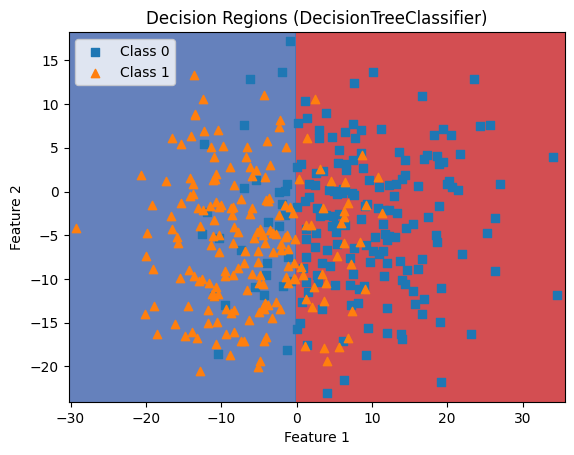

In [37]:
# визуализируем модель
plot_decision_boundary(best_tree, X_train, y_train)